<a href="https://colab.research.google.com/github/vash57/PRODIGY/blob/main/TASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# GPU CHECK
import torch
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.1f} GB")
else:
    print("⚠ WARNING: No GPU detected. Go to Runtime → Change runtime type → Hardware accelerator → GPU")

CUDA available: True
GPU: Tesla T4
GPU Memory: 15.8 GB


In [2]:
!pip install -q diffusers transformers accelerate torch torchvision xformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 MB 10.9 MB/s eta 0:00:00


In [3]:
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
model_id = "runwayml/stable-diffusion-v1-5"
device = "cuda" if torch.cuda.is_available() else "cpu"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    safety_checker=None,
    requires_safety_checker=False
)

pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to(device)
pipe.enable_attention_slicing()
print("Model loaded successfully!")

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

merges.txt: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Model loaded successfully!


In [8]:
def generate_image(
    prompt,
    negative_prompt="blurry, low quality, distorted, ugly",
    width=512,
    height=512,
    num_inference_steps=20,
    guidance_scale=7.5,
    num_images=1,
    seed=None
):
    if seed is not None:
        generator = torch.Generator(device=device).manual_seed(seed)
    else:
        generator = None

    print(f"Generating {num_images} image(s)...")
    result = pipe(
        prompt=prompt,
        negative_prompt=negative_prompt,
        width=width,
        height=height,
        num_inference_steps=num_inference_steps,
        guidance_scale=guidance_scale,
        num_images_per_prompt=num_images,
        generator=generator
    )
    return result.images

Generating 1 image(s)...


  0%|          | 0/20 [00:00<?, ?it/s]

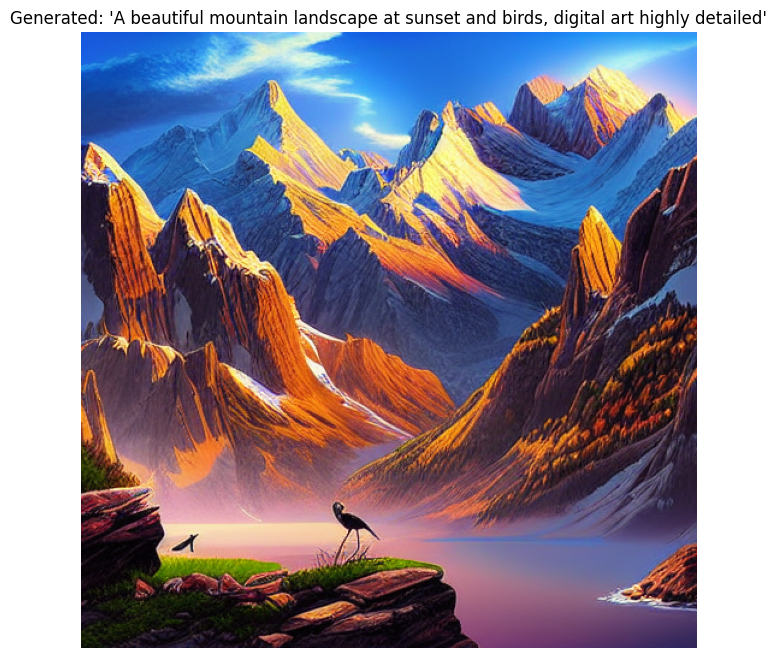

 Image saved as 'my_image.png'


In [9]:
prompt = "A beautiful mountain landscape at sunset and birds, digital art highly detailed"

images = generate_image(prompt, num_images=1)
plt.figure(figsize=(8, 8))
plt.imshow(images[0])
plt.axis('off')
plt.title(f"Generated: '{prompt}'")
plt.show()

images[0].save("my_image.png")
print(" Image saved as 'my_image.png'")


--- Generating 1 ---
Generating 1 image(s)...


  0%|          | 0/20 [00:00<?, ?it/s]

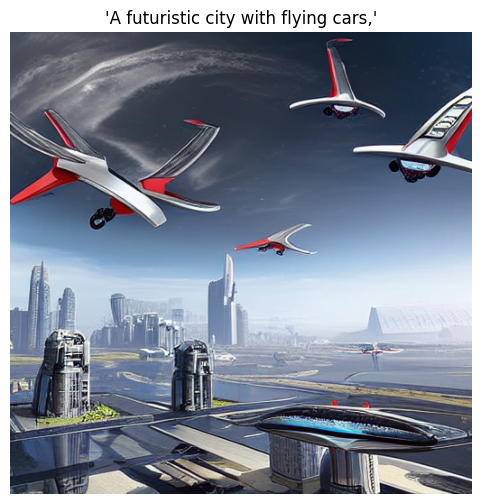


--- Generating 2 ---
Generating 1 image(s)...


  0%|          | 0/20 [00:00<?, ?it/s]

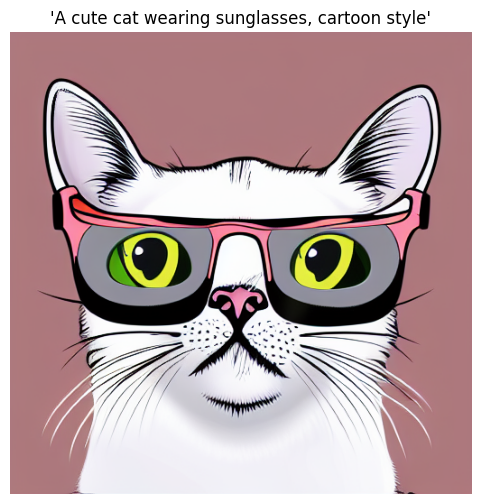


--- Generating 3 ---
Generating 1 image(s)...


  0%|          | 0/20 [00:00<?, ?it/s]

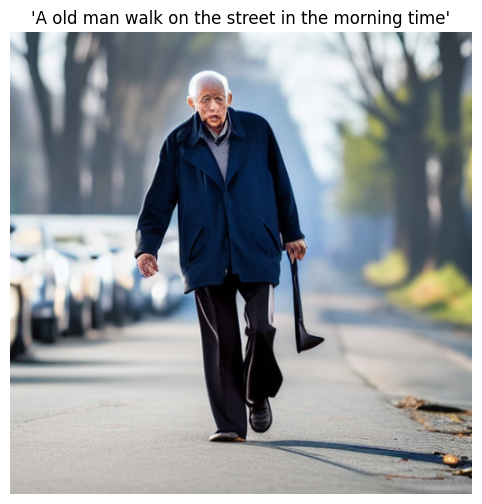

In [10]:
my_prompts = [
    "A futuristic city with flying cars,",
    "A cute cat wearing sunglasses, cartoon style",
    "A old man walk on the street in the morning time",


]

for i, prompt in enumerate(my_prompts):
    print(f"\n--- Generating {i+1} ---")
    images = generate_image(prompt, num_images=1)
    plt.figure(figsize=(8, 6))
    plt.imshow(images[0])
    plt.axis('off')
    plt.title(f"'{prompt}'")
    plt.show()
    images[0].save(f"my_image_{i+1}.png")